Matched image


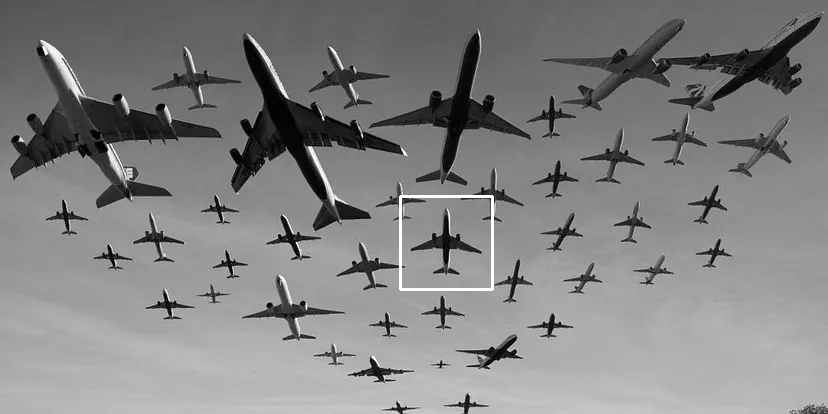

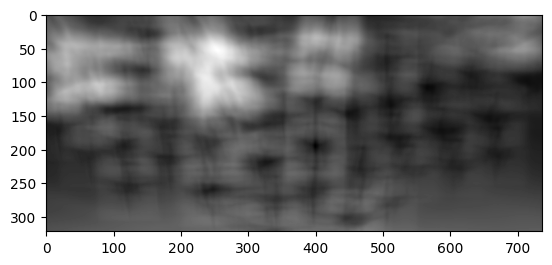

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


img_rgb = cv2.imread('/content/flite.jpeg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('/content/template.jpeg', 0)
h, w = template.shape[::]

#methods available: ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
# For TM_SQDIFF, Good match yields minimum value; bad match yields large values
# For all others it is exactly opposite, max value = good fit.
plt.imshow(res, cmap='gray')

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc  #Change to max_loc for all except for TM_SQDIFF
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img_gray, top_left, bottom_right, 255, 2)  #White rectangle with thickness 2.

print("Matched image")
cv2_imshow( img_gray)
cv2.waitKey()
cv2.destroyAllWindows()



Matched image


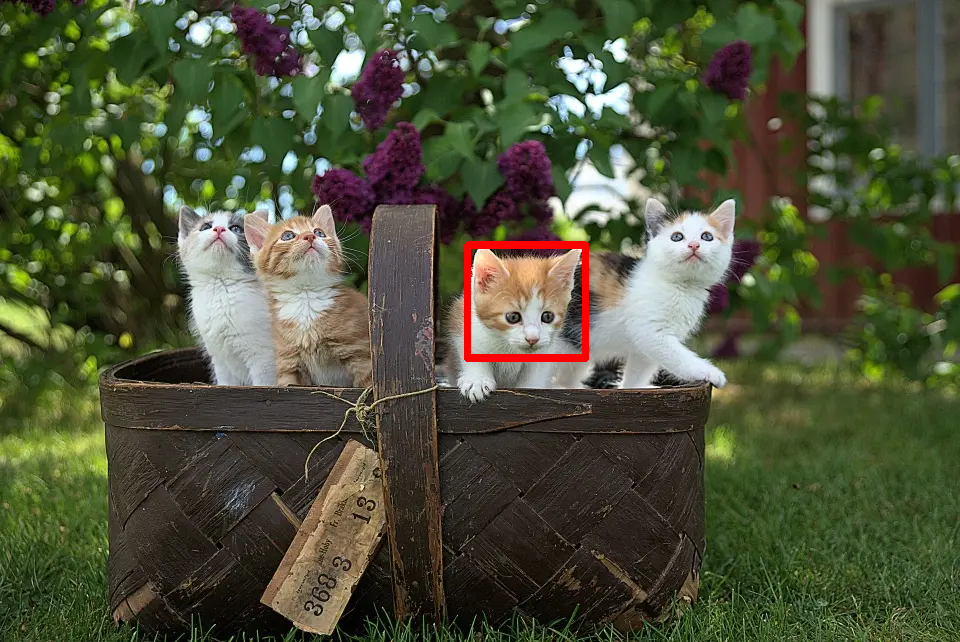

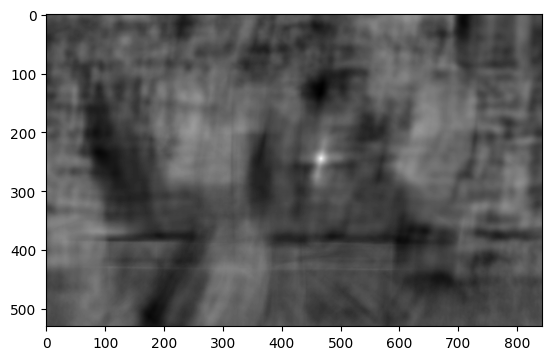

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


img_rgb = cv2.imread('/content/cat.jpeg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('/content/catt.jpeg',0)
h, w = template.shape[::]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
plt.imshow(res, cmap='gray')

threshold = 0.8 #Pick only values above 0.8. For TM_CCOEFF_NORMED, larger values = good fit.

loc = np.where( res >= threshold)
#Outputs 2 arrays. Combine these arrays to get x,y coordinates - take x from one array and y from the other.

#Reminder: ZIP function is an iterator of tuples where first item in each iterator is paired together,
#then the second item and then third, etc.

for pt in zip(*loc[::-1]):   #-1 to swap the values as we assign x and y coordinate to draw the rectangle.
    #Draw rectangle around each object. We know the top left (pt), draw rectangle to match the size of the template image.
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)  #Red rectangles with thickness 2.

#cv2.imwrite('images/template_matched.jpg', img_rgb)
print("Matched image")
cv2_imshow( img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()
